In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
# Creating a path for my project folder
path = r'C:\Users\Ruth Kassaye\Documents\CareerFoundery\DataImmersion\Achievement_4'

In [3]:
# Importing products.csv
df_prods = pd.read_csv(os.path.join(path,'02 Data','Original Data','products.csv'), index_col = False)


In [4]:
# Importing department_wrangled.csv file
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Original Data','orders.csv'), index_col = False)

## 1. Mixed-Type Data

In [5]:
# Creat a dataframe
df_test = pd.DataFrame()

In [6]:
# Inserting records in the df_test dataframe
df_test['mix'] = ['a', 'b', 1, True]

In [7]:
#Calling df_test dataframe
df_test

,mix
0,a
1,b
2,1
3,True


## Creating a custom function that searches for mixed-type columns

### 1.1 Finding mixed-type columns, consistency checks

In [8]:
# Check for mixed types
for col in df_test.columns.tolist(): 
    weird = (df_test[[col]].applymap(type) != df_test[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_test[weird]) > 0:
        print(col)

mix


#### Note: From the above output, I learn that the df_test dataframe has a mixed data type beacuse the condition is met and the code is executed. Panda is telling me that a column named 'mix' has a mixed data type

### 1.2 Fixing mixed-type columns
- The first step is **deciding what single data type the column in question should be**. If your column contained mostly names, for instance, it should be a string. If it contained mostly order numbers, it should be a numeric value of some sort. 
- You can only make a knowledged decision about what data type the column should be **after having explored and analyzed the data in your dataframe**. Once you’ve reached a decision, you can run the following code

In [9]:
df_test['mix'] = df_test['mix'].astype('str')

#### - Note that this will convert a column’s data type from numeric to string
- To change this, simply **update the str within the astype() function to int64** or whichever numeric data type you want to use.

## 2. Missing Values

### 2.1 Finding Missing Values
- isnull() function is used to find missing observations
- sum() functions tells me how many total missing observations there are
- True values can also be interpreted numerically as 1, and False values can also be interpreted numerically as 0
- If every missing observation is equal to 1, then you can simply add them up using the sum() function to obtain the total number of missing observations

In [10]:
df_prods.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

#### The result states that the product_name columns has 16 missing values
- To actually view these 16 values, you can create a subset of the dataframe containing only the values in question
- Create a new dataframe, df_nan, containing only those values within the "product_name" column that meet the condition isnull() = True

In [11]:
# Creating a new dataframe that stores missing values of the product_column from the df_prods dataframe
df_nan = df_prods[df_prods['product_name'].isnull() == True]

In [12]:
# Calling the df_nan dataframe
df_nan

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


### 2.2 Addressing Missing Values

### Ways to deal with missing data:

1. Create a new variable that acts like a flag based on the missing value.
2. Impute the value with the mean or median of the column (if the variable is numeric).
   - use mean of a column if the values of that column are normally distributed. If not use median instead of the mean. Normal distribution means: when **mean, median and mode** converge to the **same value**
3. Remove or filter out the missing data.

### If you choose to use the mean, you can use the df.describe() function to find the mean of the column in question, then use the following code to replace your missing values with it:
- ['column with missings'].fillna(mean value, inplace=True)
- ['column with missings'].fillna(median value, inplace=True)

In [13]:
# To know the number of rows and columns 
df_prods.shape

(49693, 5)

## Dealing with missing values where the data type is string
- The missing values here are product names, which are strings. String values can’t be imputed like numeric values. You can either remove the missing values entirely or filter out the ones that aren’t missing into a subset dataframe 

In [14]:
#Filter out the ones that aren’t missing into a subset dataframe 
df_prods_clean = df_prods[df_prods['product_name'].isnull() == False]

In [15]:
df_prods_clean

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


In [16]:
df_prods_clean.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
prices           0
dtype: int64

## Another way you can drop all missing values is via the following command:
- **Note**: the following command is directly drops the missing values, using **inplace = True** in the original dataframe(df_prods) instead of the above commands that created a subset dataframe that excludes null values (df_pords_clean) from the orignal dataframe (df_prods)
- If you don’t specify an inplace argument in your code, the function will take the default setting, which is inplace = False. When specified as False, the command will only return a view of the changed dataframe, leaving the original dataframe untouched.
- Overwriting can be risky. Unless you’re absolutely sure it’s safe to drop the values in question, you should create a new dataframe instead

In [17]:
# Dropping null values directily from the original dataframe
df_prods.dropna(inplace = True)

In [18]:
df_prods.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
prices           0
dtype: int64

## Finding Duplicates 
- **Tip**: Before handling duplicate values,better to get clarification from your client before proceeding with any data manipulation.

###  Checking full duplicates: Checking rows that have the exact same values in every column 

In [19]:
# This code creates a new df_dups subset dataframe, from the df_prods_clean dataframe,containing only rows that are duplicates.
df_dups = df_prods_clean[df_prods_clean.duplicated()]

In [20]:
df_dups

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


## Addressing Duplicates

In [21]:
df_prods_clean.shape

(49677, 5)

In [22]:
# Create a new dataframe that doesn’t include the duplicates
df_prods_clean_no_dups = df_prods_clean.drop_duplicates()

In [23]:
# df_prods_clean_no_dups contains only the unique rows from df_prods_clean
df_prods_clean_no_dups.shape

(49672, 5)

In [24]:
# Exporting df_prods_clean_no_dups
df_prods_clean_no_dups.to_csv(os.path.join(path,'02 Data','Prepared Data','products_checked.csv'))

## Checking for outliners using describtive statistics

In [25]:
df_prods['prices'].describe()

count    49677.000000
mean         9.993164
std        453.592708
min          1.000000
25%          4.100000
50%          7.100000
75%         11.100000
max      99999.000000
Name: prices, dtype: float64

In [26]:
# other way of knowing descriptive statistics

df_prods['prices'].mean()

9.993163838396061

In [27]:
df_prods['prices'].median()

7.1

In [28]:
df_prods['prices'].max()

99999.0

 - **Reflection on the descriptive statistics of the price column**: While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost USD 99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking my histogram
 
 
 
 - when conducting an **exploratory analysis**, you can also use **scatterplots** to visualize the distribution of data points in order to identify any outliers. To do this for the current example, let’s try plotting the “prices” column against itself. This will reveal whether there are any outliers.

<AxesSubplot:xlabel='prices', ylabel='prices'>

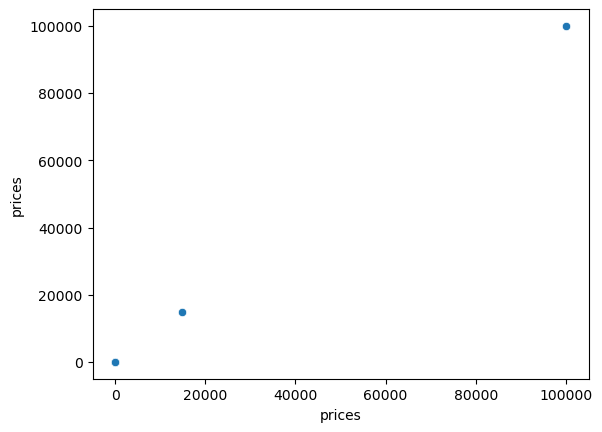

In [29]:
sns.scatterplot(x = 'prices', y = 'prices', data= df_prods)

  - **Analysis of the scatterplot**:  there are two data points far, far beyond values you’d ever expect—values close to 20,000 and even 100,000. This close-to-100,000 value corresponds to the max value you identified in your checks. But what about the close-to-20,000 value? To investigate this, you can run a few more exploratory checks on your data.

### First step: determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item

- If you imagined the maximum price anyone would pay in a supermarket were around USD 100, then anything above that amount could be considered an outlier. Run this check via the following code:|

In [30]:
df_prods.loc[df_prods['prices'] >100]

,product_id,product_name,aisle_id,department_id,prices
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0



- **Lessons learned**: This was a practical example of why you should be very pedantic about conducting your data quality checks—as well as how visualizations can help you explore your data. You should never leave an issue like this unfixed as it could very well blow up in your face at some point and spoil the results you’re trying to achieve. A first likely step would be to consult your client or a more senior stakeholder for guidance on how to treat these values. They might, for instance, be special values within the Instacart system.

In [31]:
##The command looks for values above 100 within the “prices” column and assigns them a value. In this case, that new value is np.nan. This is a function from the NumPy library; it’s used to assign missing values.
#df_prods.loc[df_prods['prices']>100, 'prices'] = np.nan

In [32]:
# check whether the replacement was successful by running a max-value check on your “prices” column

df_prods['prices'].max()

99999.0

# Task
  ## Directions

### Q1. If you haven’t performed the consistency checks covered in this Exercise on your df_prods dataframe, do so now.

  - Done above. Please see section 2: replacing the missing value of product_name column

### 2Q. Run the df.describe() function on your df_prods dataframe. Using your new knowledge about how to interpret the output of this function, share in a markdown cell whether anything about the data looks off or should be investigated further.
  -  Tip: Keep an eye on min and max values!

In [33]:
# Checking descriptive statistics of df_prods dataframe
df_prods.describe()

,product_id,aisle_id,department_id,prices
count,49677.000000,49677.000000,49677.000000,49677.000000
mean,24850.194235,67.763110,11.728687,9.993164
std,14340.588602,38.316396,5.850651,453.592708
min,1.000000,1.000000,1.000000,1.000000
25%,12433.000000,35.000000,7.000000,4.100000
50%,24851.000000,69.000000,13.000000,7.100000
75%,37267.000000,100.000000,17.000000,11.100000
max,49688.000000,134.000000,21.000000,99999.000000


In [34]:
# Printing the data type of df_prods dataframe
df_prods.dtypes

product_id         int64
product_name      object
aisle_id           int64
department_id      int64
prices           float64
dtype: object

- product_id, aisle_id, department_id are integer data type; it should be string as the variables don’t represent real numeric values. 

### Q3. Check for mixed-type data in your df_ords dataframe.

In [35]:
# Checking for mixed-type data in your df_ords dataframe
for col in df_ords.columns.tolist(): 
    weird = (df_ords[[col]].applymap(type) != df_ords[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (df_ords[weird]) > 0:
        print(col)

### Q4. If you find mixed-type data, fix it. The column in question should contain observations of a single data type.

- The above function that checks mixed data type didn't respond to any columns. Hence, the df_ords dataframe doesn't include mixed data-type

### Q5. Run a check for missing values in your df_ords dataframe.
- In a markdown cell, report your findings and propose an explanation for any missing values you find.

In [36]:
# Checking null values from the df_ords dataframe
df_ords.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

- **Result**: The days_since_prior_order column has 206209 missing values

### Q6. Address the missing values using an appropriate method.
 - In a markdown cell, explain why you used your method of choice.

In [37]:
# Checking descriptive statistics of df_ords dataframe
df_ords.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


#### As we can see from the above descriptive table, the pd_ords dataframe is not normally-distributed, rather it is left skewed distribution (median>mean). Hence, I have considered to take the median value, i.e., 7, for data imputation. 

In [38]:
# Filling in the null values of the days_since_prior_order column with the median value of that column. 
df_ords_clean = df_ords.fillna(value =df_ords['days_since_prior_order'].median())

In [39]:
# Checking the days_since_prior_order column now doesn't have null values, as I have replaced the null values with the median value of that column in the above step
df_ords_clean.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

### Q7. Run a check for duplicate values in your df_ords data.
 - In a markdown cell, report your findings and propose an explanation for any duplicate values you find.

In [40]:
# This code creates a new df_ords_dups subset dataframe that contains only duplicated values
df_ords_dups = df_ords[df_ords.duplicated()]

In [41]:
# Calling df_ords_dups dataframe to check if the dataframe has duplicate values
df_ords_dups

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order


 **Result**: No duplicate value is found.

### Q8. Address the duplicates using an appropriate method.
- In a markdown cell, explain why you used your method of choice.

 - **Result**: No duplicate value is found.

### Q9. Export your final, cleaned df_prods and df_ords data as “.csv” files in your “Prepared Data” folder and give them appropriate, succinct names.

In [44]:
df_ords_clean.shape

(3421083, 7)

In [42]:
# Exporting df_ords_clean
df_ords_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_checked.csv'))

- I have already exported df_prods dataframe, giving a file name 'products_cecked'